<a href="https://colab.research.google.com/github/DavidMichaelH/DavidMichaelH.github.io/blob/master/QuantumMarkovChains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we experiment with simple Quantum Markov Chains. Essentially we define the Schrödinger equation on a graph $G$. In place of the Laplacian $-\Delta$ we use the graph Lapacian matrix, $L = D - A$ where $D$ is the degree matrix and $A$ is the adjacency matrix.

The model of a "free particle" is then,
$$ - L | \psi(t) \rangle = i \partial_t   | \psi(t) \rangle  .$$ 

Later we could include a potential field via a diagonal matrix $V$. Further we can consider $n$-interacting particles but considering a single Schrödinger equation on the tensor product of $n$-copies of the graph $G$.


We start by importing csgraph to represent our graph $G$. In this case we will start with something very simple, the complete graph on $3$-vertices, $K_3$.


In [47]:
import numpy as np 
from scipy.sparse import csgraph
from scipy.linalg import expm

We create the adjaceny matrix.

In [151]:
A = np.array([[0 , 1 , 1 ], [1 , 0 , 1 ] , [1 , 1 , 0 ]])

Next we create the graph Laplacian 
L = A-D 

In [152]:
L = csgraph.laplacian(A, normed=False)

We will use the matrix exponential to run the time evolution,

$$ |\psi(t) \rangle = \exp ( - i t L ) |\psi(0) \rangle $$

We will decide on an initial conditioon,


$$ |\psi(0) \rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$$

which we can interpret as the particle being localized at the first vertex at time $t=0$. 

In [153]:
InitState = np.array([1,0,0])

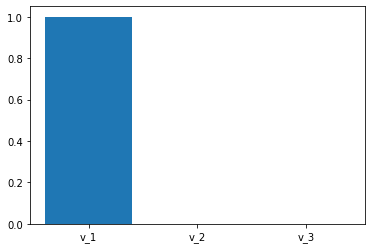

In [154]:
import matplotlib.pyplot as plt
from matplotlib import animation

NumTimeSteps = 200;
FinalTime = 20;
Time = np.linspace(0, FinalTime, num=NumTimeSteps+1)

def Prob(n):
    PSI_t = np.matmul(expm(-1j*Time[n]*L),InitState)
    PSI_t = np.absolute(PSI_t)
    PSI_t = np.square(PSI_t)
    #return np.transpose(PSI_t)
    #return [1/float(n*k) for k in range(1,3)]
    return PSI_t.tolist()

    

fig=plt.figure()

n=100 #Number of frames
x=range(1,4)




#ax = fig.add_axes([0,0,1,1])
vertices = ['v_1', 'v_2', 'v_3']
#ax.bar(vertices,weights)

barcollection = plt.bar(vertices,Prob(0))


plt.show()

def animate(i):
    y=Prob(i+1)
    for i, b in enumerate(barcollection):
        b.set_height(y[i])

anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n,
                             interval=NumTimeSteps)

anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
#plt.show()

from IPython.display import HTML
from base64 import b64encode
mp4 = open('mymovie.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Next we decide to spice things up a bit by considering the nearest neighbor graph $\{1,...,8\}$. We can think of this to some extent as an approximation of a particle confiend to a box. 


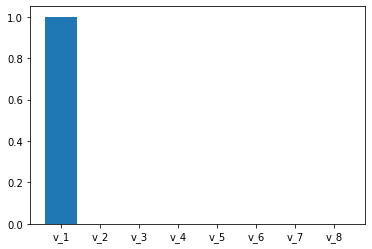

In [155]:
A = np.array([[0, 1, 0, 0, 0, 0, 0, 0  ],[1,0, 1, 0, 0, 0, 0, 0  ],[0, 1,0, 1, 0, 0, 0, 0  ] ,[0,0, 1,0, 1, 0, 0, 0 ],[0,0,0, 1,0, 1, 0, 0 ] ,[0,0,0,0, 1,0, 1, 0 ] ,[0,0,0,0,0, 1,0, 1 ],[0,0,0,0,0,0, 1,0]])

L = csgraph.laplacian(A, normed=False)

InitState = np.array([1, 0, 0, 0, 0, 0, 0, 0  ]);

import matplotlib.pyplot as plt
from matplotlib import animation

NumTimeSteps = 500;
FinalTime =60;
Time = np.linspace(0, FinalTime, num=NumTimeSteps+1)

def Prob(n):
    PSI_t = np.matmul(expm(-1j*Time[n]*L),InitState)
    PSI_t = np.absolute(PSI_t)
    PSI_t = np.square(PSI_t)
    #return np.transpose(PSI_t)
    #return [1/float(n*k) for k in range(1,3)]
    return PSI_t.tolist()

    

fig=plt.figure()

n=100 #Number of frames
x=range(1,4)




#ax = fig.add_axes([0,0,1,1])
vertices = ['v_1', 'v_2', 'v_3', 'v_4','v_5', 'v_6', 'v_7', 'v_8']
#ax.bar(vertices,weights)

barcollection = plt.bar(vertices,Prob(0))


plt.show()

def animate(i):
    y=Prob(i+1)
    for i, b in enumerate(barcollection):
        b.set_height(y[i])

anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n,
                             interval=NumTimeSteps)

anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
#plt.show()

from IPython.display import HTML
from base64 import b64encode
mp4 = open('mymovie.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# **Interacting Particles**

We consider two interacting particles on a graph $G$. Basic quantum mechanics says that if two *noninteracting* particles have Hamiltonians $H_1$ and $H_2$ repsectively then the Hamiltonian of their tensor product is given by,

$$ H_{12} = H_1 \otimes I  +I\otimes   H_2  $$ 
where $I$ is the identity opertator. 

The momentum operators of each particle should commute and so we treat this property of the particles as noninteracting. Let,

$$ L_{12} = L \otimes I  +I\otimes   L  $$ 
where $L$ is the graph Laplacian of $G$. Then $L_{12}$ is the kinetic energy operator of two non-interacting particles. 

We want to include a form of interaction via a sort of repulsion. For this we define a Hamiltonian of the form,

$$ H = - L_{12} + V $$ 
where $V$ is a matrix with large positive values on sites of the form $(v,v)$ for $v \in V$.  

